### Quantum Cryptography - Day 9
# E91 Style Entangled Key Distribution
**E91** which is a qunatum key distribution (QKD) method based  on entangled pair.Unlike the BB84 protocol that uses single qubits ,**E91** uses **entangled qubit pairs** to generate a shared secreet key between two parties ,typically named Alica and Bob.In this notebook we will learn:
- How to **Distributes entangled qubit pair**
- How to perform **random measurement bases** and understand their importance.
- How to **extract keys** after correcting measurement outcome. 
- How to **Analyze error** and understand the effect of evesdropping.

## Import Required Libraries


In [1]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
import numpy as np
from qiskit.quantum_info import Statevector
import random

## Step 1 : Entangled Pair Distribution
Entanglement Ensure that measyrement outcomes of Alice and Bob are correlated,even if they are far apart .This is the core principle of Behind the E91 Security.Entangled pair allows us to detect evesdropping  using Bell inquality violations.

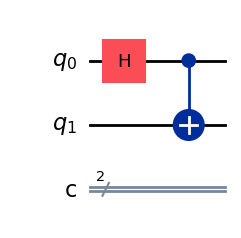

In [7]:
def create_bell_pair():
    qc=QuantumCircuit(2,2)
    qc.h(0)
    qc.cx(0,1)
    return qc

# Create Entangled Pair
bell_pair=create_bell_pair()
bell_pair.draw('mpl')

## Step 2 : Random Measurement Bases
Randomly choosing measurment bases prevents an evesdropping from predicting which basis is used .Alice and Bob choose bases from a set(e.g - X, Y,Z)
Only when Alice and Bob choose compatible bases , their measurement are correlated .This allow them to detect eedropping thorugh mismatched correlations.

In [17]:
# Define measurement bases(Z=0,X=1,Y=2)
bases=['Z','X','Y']

# Randomly select bases for Alice and Bob
alice_bases=[random.choice(bases) for _ in range (20)]
bob_bases=[random.choice(bases) for _ in range (20)]
print("Alice Bases :",alice_bases)
print("Bob Bases :",bob_bases)

Alice Bases : ['Y', 'X', 'Z', 'Y', 'X', 'Z', 'X', 'Y', 'X', 'Z', 'Z', 'Z', 'Z', 'Y', 'X', 'Z', 'X', 'Y', 'Y', 'Y']
Bob Bases : ['Z', 'X', 'Z', 'X', 'Z', 'Y', 'Z', 'Y', 'Y', 'Z', 'Y', 'Y', 'Y', 'Y', 'Z', 'Y', 'Z', 'X', 'Y', 'X']


## Step 3 : Measure Qubit According to Choosen Bases
Measurement in a specific basis collapses the qubit state . This choice of basis affects the correlation between Alice's and Bob's results.If the bases matches  ,the result are correlated. if they differ results are random.

In [18]:
sim=AerSimulator()
def measure_in_basis(qc,qubit,basis):
    if basis=='X':
        qc.h(qubit)
    elif basis =='Y':
        qc.sdg(qubit)
        qc.h(qubit)
    return qc

# Measure 10 entangled pairs
results=[]
for i in range(20):
    qc=create_bell_pair()
    qc=measure_in_basis(qc,0,alice_bases[i])
    qc=measure_in_basis(qc,1,bob_bases[i])
    qc.measure([0,1],[0,1])
    qc.save_statevector()

    job=sim.run(qc,shots=1)
    outcome=job.result().get_counts()
    results.append(outcome)
results

[{'01': 1},
 {'11': 1},
 {'11': 1},
 {'11': 1},
 {'01': 1},
 {'10': 1},
 {'11': 1},
 {'01': 1},
 {'11': 1},
 {'11': 1},
 {'11': 1},
 {'00': 1},
 {'01': 1},
 {'01': 1},
 {'11': 1},
 {'11': 1},
 {'11': 1},
 {'11': 1},
 {'01': 1},
 {'11': 1}]

 ## Step 5 : Key Extraction and Error Analysis
 Only measuement results where Alice and Bob used compatible bases are used to form the key .Ther rest are discarded or used to check for error..error rate analysis help detect evesdropping . A higher than expected error indicates a potential interception attempt.

In [25]:
# Extract raw key where bases match
raw_key=[]
errors=0
valid_rounds=0
for i in range(len(results)):
    if alice_bases[i]== 'Z' and bob_bases[i]=='Z':
        valid_rounds+=1
        bitstring=list(results[i].keys())[0]
        alice_bit=bitstring[-1]
        bob_bit=bitstring[-2]
        raw_key.append(alice_bit)

        if alice_bit != bob_bit:
            errors +=1


error_rate=errors/valid_rounds if valid_rounds >0 else 0
print("Raw Key(after Basis Matching):",raw_key)
print("Valid rounds:",valid_rounds)
print("Errors :",errors)
print("Estimate Error rate :",error_rate)



Raw Key(after Basis Matching): ['1', '1']
Valid rounds: 2
Errors : 0
Estimate Error rate : 0.0


So the E91 protocol provides **device-indpendent security** because the entanglement correalations and Bell inequality violation are used to  detect any interception.in this notebook we simulate the full process ,giving a clear understanding security and key geneartion using E91.

---

**Author** : Shreya Palase

**Repository**: Quantum-Cryptography(codeQubit)

**file** : day09_E91_Style_Entangled_KeyDistribution.ipynb

**Date created**: 01-February-2026

<sub>© Shreya Palase- All Rights Reserved.This notebook is part of a structured learning series designed for Github publication.</sub>